In [112]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
import scipy
#Are the following valid states of a qubit ?
theta = 30
states = [ [np.sqrt(3)/2,-1/2],[0.8,0.6], [np.cos(theta), np.sin(theta)*1j] , [1/2 + 1j/2, 1/2 - 1j/2]]
invalidStates = [[0.7, 0.3],[np.cos(theta)**2,-1* (np.sin(theta))**2], [1/np.sqrt(2),1],]
state = Statevector([0.8,0.6j])

for s in states:
    try:  
        qc = QuantumCircuit(1)
        qc.prepare_state(Statevector(s), [0])
        #Note that draw doesn't produce a drawing here
        qc.draw()
    except:
        print(f"This is not a valid state: {s}")

qc = QuantumCircuit(1)
qc.prepare_state(Statevector(states[0]), [0])
#Outside the try except we do get a drawing.
qc.draw()


┌─────────────────────────────────┐
q: ┤ State Preparation(0.86603,-0.5) ├
   └─────────────────────────────────┘

[0.03333333 0.13333333 0.3        0.53333333]
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Result(backend_name='qasm_simulator', backend_version='0.17.0', job_id='3d88917f-9334-4cd1-b8c9-b7866d1eb02f', success=True, results=[ExperimentResult(shots=8196, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 5481, '0x0': 2715}), header={'creg_sizes': [['creg', 2]], 'global_phase': 0.7853981633974483, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-519', 'qreg_sizes': [['a', 2]], 'metadata': {}}, status=DONE, seed_simulator=2149536649, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0312994, 'sample_measure_time': 0.0016634, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 32400, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12

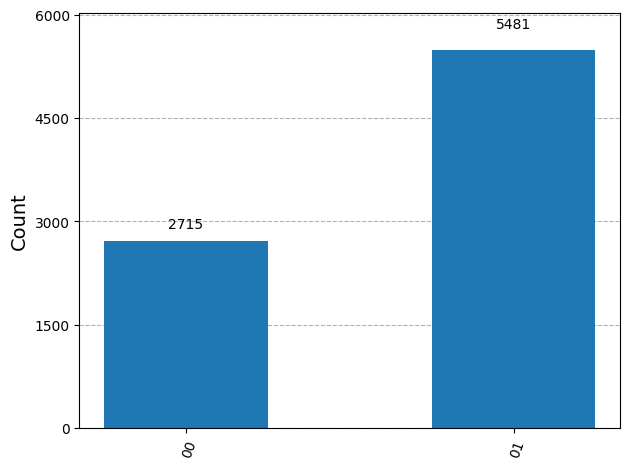

In [79]:
# A two qubit system is in the following state: 1/sqrt(30) * (/00> + 2i /01> -3 /10> -4i /11>) 
# the first qubit is measured and observed to be 1. What is the state of the system after the measurement ?
# what is the probability that a subsequent measurement of the second qbit will be yield 1 ?
qc = QuantumCircuit()
q0 = Statevector.from_label("00")
q1 = Statevector.from_label("01")
q2 = Statevector.from_label("10") #1/np.sqrt(30) * []])
q3 = Statevector.from_label("11")
newState = 1/np.sqrt(30) * (q0 + 2j*q1 -3*q2 -4j*q3)
print(newState.probabilities())
print(q3)
qr = QuantumRegister(2, 'a')
cr = ClassicalRegister(2, 'creg')
qc.add_register(cr)
qc.add_register(qr)
qc.prepare_state(newState,[0,1])
qc.measure(qr[0],cr[0])
qc.draw("mpl")
qasm_sim = Aer.get_backend('qasm_simulator')
sv_sim = Aer.get_backend('statevector_simulator')
qcTranspiled1 = transpile(qc, backend = qasm_sim)
qcTranspiled2 = transpile(qc, backend = sv_sim)
job1 = qasm_sim.run(qcTranspiled1, shots=8196)
job2 = sv_sim.run(qcTranspiled2)
print(job1.result())
job2.result()


#ket = job1.result().get_statevector()
#import numpy as np
# To treat ket as a numpy array you have to explicitly use np.asarray
#for amplitude in np.asarray(ket):
#    print(amplitude)
hist = job1.result().get_counts()
print(hist)
plot_histogram(hist)

In [ ]:

#Find the eigenvalues and associated eigenvectors of 
H = 1/np.sqrt(2) * np.array([[1,-1], [1,1]])

Y = np.array([[0, -1j],[1j, 0]])
a = np.array([1j/np.sqrt(2), 1/np.sqrt(2)])

print(Y)
print(f"Yx{a} == {Y.dot(a)} == {-1 * a}")
print(f"{Y.dot([1,1])}")
np.linalg.eig(Y)
#


[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Yx[0.        +0.70710678j 0.70710678+0.j        ] == [ 0.        -0.70710678j -0.70710678+0.j        ] == [-0.        -0.70710678j -0.70710678+0.j        ]
[0.-1.j 0.+1.j]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0.70710678+0.70710678j 0.70710678-0.70710678j]
EigResult(eigenvalues=array([0.70710678+0.70710678j, 0.70710678-0.70710678j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))


In [108]:
print(H)
print(np.linalg.eigvals(H))
print(np.linalg.eig(H))

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0.70710678+0.70710678j 0.70710678-0.70710678j]
EigResult(eigenvalues=array([0.70710678+0.70710678j, 0.70710678-0.70710678j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))


In [ ]:
# Show that Hadamard and Pauli are unitary
X = np.array([[0,1],[1,0]])
print(f"XxX is: {X.dot(X)} which is the same as the identity matrix: {X.dot(X) == np.eye(2)}")

XxX is: [[1 0]
 [0 1]] which is the same as the identity matrix: [[ True  True]
 [ True  True]]


I tensor H is: [[ 1.  1.  0.  0.]
 [ 1. -1.  0. -0.]
 [ 0.  0.  1.  1.]
 [ 0. -0.  1. -1.]]
array([[ 1.,  1.,  0.,  0.],
       [ 1., -1.,  0., -0.],
       [ 0.,  0.,  1.,  1.],
       [ 0., -0.,  1., -1.]])


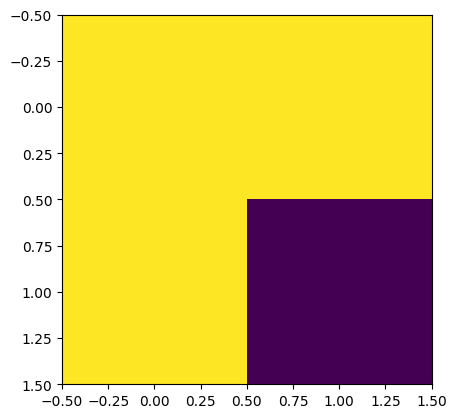

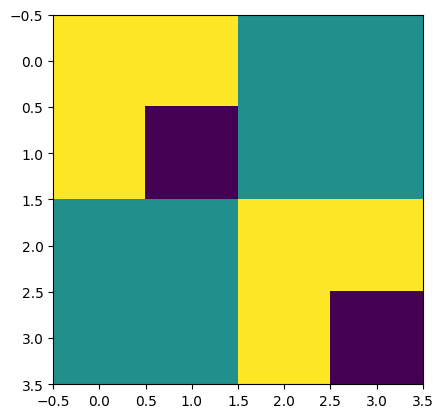

In [131]:
 #If I is the 2-dimensional identity matrix and H is the Hadamard operator, give matrix rep resentations of the operators I \tensor H and H \tensor I
I = np.eye(2)
H = scipy.linalg.hadamard(2)
fig,ax = plt.subplots()
ax = plt.imshow(np.squeeze(H))
ItH = np.kron(I,H)#np.tensordot(I,H, axes = 1)
print(f"I tensor H is: {ItH}")
import pprint
pprint.pprint(ItH)
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots()
ax2 = plt.imshow(np.squeeze(ItH))

In [137]:
# For the Pauli matrices XY and Z, show that XY = iZ.
Z = np.array([[1,0],[0,-1]])
print(X.dot(Y)== 1j*Z)


[[ True  True]
 [ True  True]]


[0.64 0.   0.   0.36]
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Result(backend_name='qasm_simulator', backend_version='0.17.0', job_id='2beecb5e-090d-4835-9b10-c82bd3430cd9', success=True, results=[ExperimentResult(shots=8196, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 5292, '0x1': 2904}), header={'creg_sizes': [['creg', 2], ['creg2', 2], ['c0', 2]], 'global_phase': 5.497787143782138, 'memory_slots': 6, 'n_qubits': 5, 'name': 'circuit-548', 'qreg_sizes': [['q', 1], ['a', 2], ['q0', 2]], 'metadata': {}}, status=DONE, seed_simulator=2213778056, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 3], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 6, 'time_taken': 0.0832878, 'sample_measure_time': 0.0026421, 'input_qubit_map': [[0, 0], [1, 1], [3, 2]], 'max_memory_mb': 32400, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots':

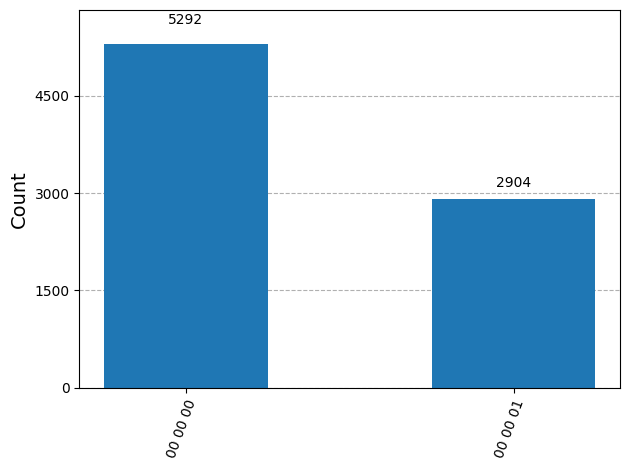

In [142]:
#Suppose a two-qubit system is in the state 0.8/00> + 0.6/11> . A Pauli X gate (i.e. a NOT
# gate) is applied to the second qubit and a measurement performed (on each qubit) in the
# computational basis. What are the probabilities of the possible measurement outcomes?
q0 = Statevector.from_label("00")
#q1 = Statevector.from_label("01")
#q2 = Statevector.from_label("10") #1/np.sqrt(30) * []])
q3 = Statevector.from_label("11")
newState = 0.8*q0 + 0.6*q3
print(newState.probabilities())
print(q3)
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc.add_register(cr)
qc.add_register(qr)
qc.prepare_state(newState,[0,1])
qc.measure(qr[0],cr[0])
qc.draw("mpl")
qasm_sim = Aer.get_backend('qasm_simulator')
sv_sim = Aer.get_backend('statevector_simulator')
qcTranspiled1 = transpile(qc, backend = qasm_sim)
qcTranspiled2 = transpile(qc, backend = sv_sim)
job1 = qasm_sim.run(qcTranspiled1, shots=8196)
job2 = sv_sim.run(qcTranspiled2)
print(job1.result())
job2.result()
hist = job1.result().get_counts()
print(hist)
plot_histogram(hist)




In [ ]:


#Show that unitary operations are norm preserving. That is, if U is unitary, then the norm of U/\psi> equals the norm of /\psi>, for all /\psi>.


In [ ]:
# Show that the entangled state 1/np.sqrt(2) (/00> + /11>)cannot be expressed as a tensor product of two single qubit states.
# Hint: start with a general expression of a tensor product of two single qubit states, (\alpha /0> + \beta /1>)(\gamma /0> +\delta /1>)andmultiply out. 


In [ ]:

# . Let = 0+ 1 , if ismeasuredusingmeasurement operatorsM0 = 0 0 and
#  M1=1 1 verifythatp(M0)= 2andp(M1)= 2.
#  1 
 
#  13. We wish to distinguish two quantum states:
#  In the rst case, the state is either 0 or 3
#  2 0+1
#  2 1 .
#  In the second case, the state is either 0 or 1
#  2 0+ 3
#  2 1
#  Which of these cases do you expect to be able to distinguish with higher probability. Verify
#  your answer using the Helstrom-Holevo bound.
#  14. Describe (qualitatively) how, if cloning were possible, then the no-signalling principle could
#  be violated

Result(backend_name='statevector_simulator', backend_version='0.17.0', job_id='9830b8c5-7f68-40b1-9d25-ae3aad0419d5', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([ 0.8660254+0.j, -0.5      +0.j],
            dims=(2,))), header={'creg_sizes': [], 'global_phase': 0.0, 'memory_slots': 0, 'n_qubits': 1, 'name': 'circuit-204', 'qreg_sizes': [['q', 1]], 'metadata': {}}, status=DONE, seed_simulator=3686107528, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 0, 'time_taken': 0.0004597, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 32400, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': F

QiskitError: 'No counts for experiment "0"'